<a href="https://colab.research.google.com/github/Raries16/Practice/blob/main/Face_Detection_using_MTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 6.0MB/s 


In [10]:
!wget -O Narendra_Modi.jpg https://www.mapsofindia.com/ci-moi-images/my-india/2014/12/narendra-modi.jpg
!wget -O Steve_Jobs.jpg https://designpress-10674.kxcdn.com/wp-content/uploads/2012/07/steve-jobs.jpg
!wget -O Dalai_Lama.jpg https://tibet.net/wp-content/uploads/2015/06/Dalai_Lama-wallpaper.jpg
!wget -O Bill_Gates.jpg https://buddybits.com/wp-content/uploads/2016/06/Bill-Gates-10-Famous-Personalities-who-are-Introverts.jpg

--2020-12-09 11:32:55--  https://www.mapsofindia.com/ci-moi-images/my-india/2014/12/narendra-modi.jpg
Resolving www.mapsofindia.com (www.mapsofindia.com)... 15.206.140.100
Connecting to www.mapsofindia.com (www.mapsofindia.com)|15.206.140.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45218 (44K) [image/jpeg]
Saving to: ‘Narendra_Modi.jpg’

Narendra_Modi.jpg   100%[===================>]  44.16K  92.4KB/s    in 0.5s    

2020-12-09 11:32:57 (92.4 KB/s) - ‘Narendra_Modi.jpg’ saved [45218/45218]

--2020-12-09 11:32:57--  https://designpress-10674.kxcdn.com/wp-content/uploads/2012/07/steve-jobs.jpg
Resolving designpress-10674.kxcdn.com (designpress-10674.kxcdn.com)... 68.70.205.2, 68.70.205.3, 68.70.205.1, ...
Connecting to designpress-10674.kxcdn.com (designpress-10674.kxcdn.com)|68.70.205.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35283 (34K) [image/jpeg]
Saving to: ‘Steve_Jobs.jpg’

Steve_Jobs.jpg      100%[================

In [1]:
from mtcnn.mtcnn import MTCNN
import cv2

In [2]:
image = cv2.imread('Narendra_Modi.jpg')

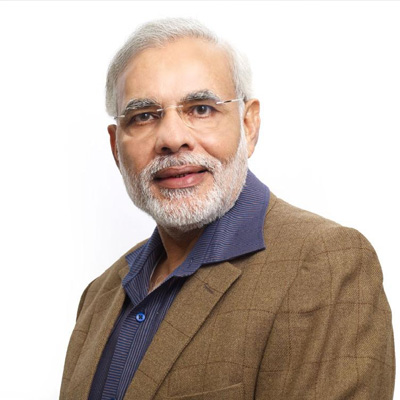

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [4]:
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
    print(face)

{'box': [113, 56, 129, 158], 'confidence': 0.9886201620101929, 'keypoints': {'left_eye': (143, 117), 'right_eye': (201, 109), 'nose': (172, 141), 'mouth_left': (154, 178), 'mouth_right': (210, 171)}}


In [5]:
def create_bbox(image):
  faces = detector.detect_faces(image)
  bounding_box = faces[0]['box']
  keypoints = faces[0]['keypoints']

  cv2.rectangle(image,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              2)

  cv2.circle(image,(keypoints['left_eye']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['right_eye']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['nose']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['mouth_left']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['mouth_right']), 2, (0,155,255), 2)

  return image

In [6]:
marked_image = create_bbox(image)

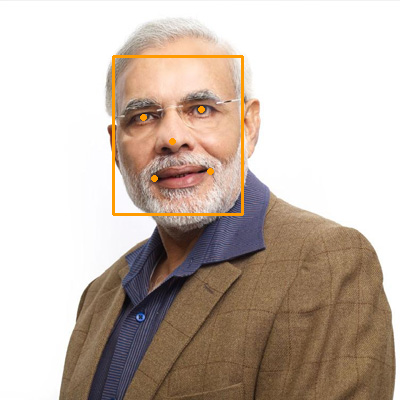

In [7]:
cv2_imshow(marked_image)

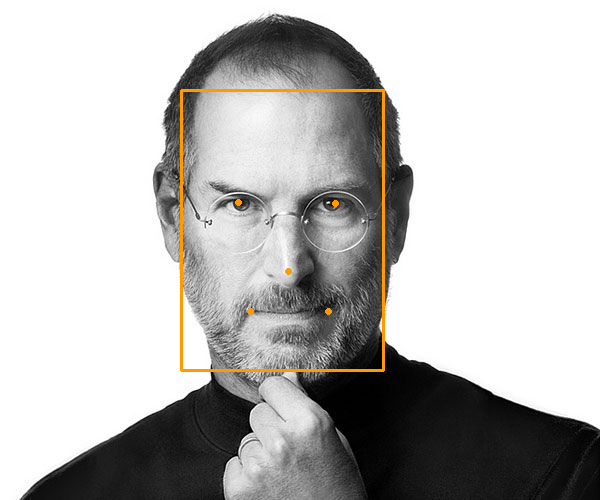

In [11]:
marked_image = create_bbox(cv2.imread('Steve_Jobs.jpg'))
cv2_imshow(marked_image)

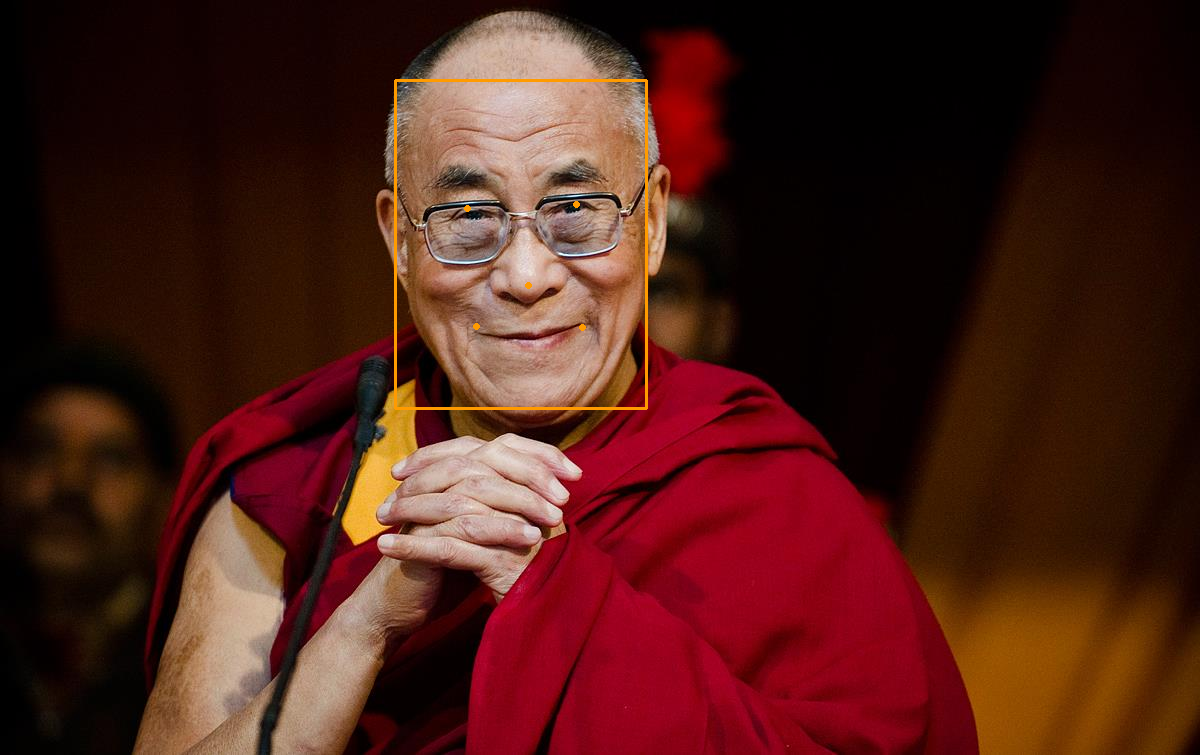

In [12]:
marked_image = create_bbox(cv2.imread('Dalai_Lama.jpg'))
cv2_imshow(marked_image)

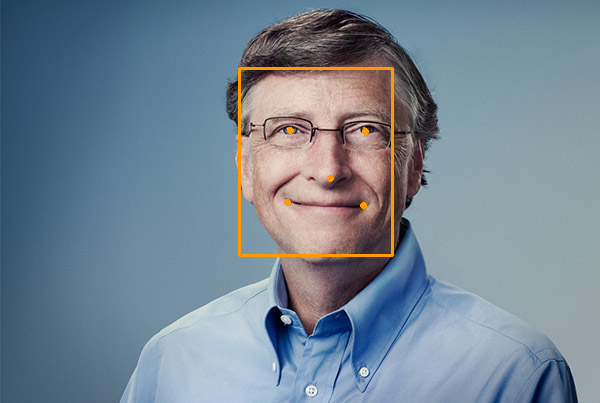

In [13]:
marked_image = create_bbox(cv2.imread('Bill_Gates.jpg'))
cv2_imshow(marked_image)